5
3
5
0


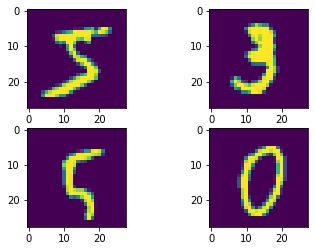

In [17]:
# -*- coding: utf-8 -*-
import numpy as np
import struct
import os
from collections import defaultdict

def read_data_sets(dir, one_hot=True):
	files = {
		'test': ['t10k-images.idx3-ubyte', 't10k-labels.idx1-ubyte'],
		'train': ['train-images.idx3-ubyte', 'train-labels.idx1-ubyte']
	}
	data_set = defaultdict(dict)
	for key,value in files.items():
		for i,fn in enumerate(value):
			file = open(os.path.join(dir, fn), 'rb')
			f = file.read()
			file.close()
			if not i:
				img_index = struct.calcsize('>IIII')
				_,size,row,column = struct.unpack('>IIII', f[:img_index])
				imgs = struct.unpack_from(str(size*row*column) + 'B', f, img_index)
				data_set['img_shape'] = (row, column, 1)
				imgs = np.reshape(imgs, (size, row*column)).astype(np.float32)
				imgs = (imgs - np.min(imgs)) / (np.max(imgs) - np.min(imgs))
				data_set[key]['images'] = imgs
			else:
				label_index = struct.calcsize('>II')
				_,size = struct.unpack('>II', f[:label_index])
				labels = struct.unpack_from(str(size) + 'B', f, label_index)
				labels = np.reshape(labels, (size,))
				if one_hot:
					tmp = np.zeros((size, np.max(labels)+1))
					tmp[np.arange(size),labels] = 1
					labels = tmp
				data_set[key]['labels'] = labels
	return data_set

if __name__ == '__main__':
	import matplotlib.pyplot as plt
	data_set = read_data_sets('/public/liujiawei/huawei/ZHB/ADF-master/mnist')
	imgs = data_set['train']['images'] * 255
	labels = data_set['train']['labels']
	img_shape = data_set['img_shape'] * 255
	# print(imgs[0])
	plt.figure()
	plt.subplot(221); plt.imshow(imgs[0].reshape(img_shape[:2])); print(np.argmax(labels[0]))
	plt.subplot(222); plt.imshow(imgs[10].reshape(img_shape[:2])); print(np.argmax(labels[10]))
	plt.subplot(223); plt.imshow(imgs[100].reshape(img_shape[:2])); print(np.argmax(labels[100]))
	plt.subplot(224); plt.imshow(imgs[1000].reshape(img_shape[:2])); print(np.argmax(labels[1000]))
	plt.show()


In [29]:
img_shape[3:4]

(28,)

In [10]:
train_imgs = data_set['train']['images'] 
train_labels = data_set['train']['labels'] 
test_imgs = data_set['test']['images'] 
test_labels = data_set['test']['labels'] 

In [14]:
print(np.shape(train_imgs),np.shape(train_labels),np.shape(test_imgs),np.shape(test_labels))

(60000, 784) (60000, 10) (10000, 784) (10000, 10)


In [15]:
DATA_PATH = "/public/liujiawei/huawei/ZHB/ADF-master/mnist/"
np.save(DATA_PATH+"mnist_train",train_imgs)
np.save(DATA_PATH+"mnist_train_label",train_labels)
np.save(DATA_PATH+"mnist_test",test_imgs)
np.save(DATA_PATH+"mnist_train_label",test_labels)